In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
            
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)

def show_dataset(x1, y1, x2, y2 ):
    plt.subplot(1,2,1)
    plt.title('Linear', fontsize=18)
    for i in range(x1.shape[0]):
        if y1[i] == 0:
            plt.plot(x1[i][0], x1[i][1], 'ro')
        else:
            plt.plot(x1[i][0], x1[i][1], 'bo')
    plt.subplot(1,2,2)
    plt.title('XOR', fontsize=18)
    for i in range(x2.shape[0]):
        if y2[i] == 0:
            plt.plot(x2[i][0], x2[i][1], 'ro')
        else:
            plt.plot(x2[i][0], x2[i][1], 'bo')
    plt.show()

def show_result(x, y, pred_y):
    pred_y = np.round(pred_y)
    cm = LinearSegmentedColormap.from_list(
        'mymap', [(1, 0, 0), (0, 0, 1)], N=2)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    plt.scatter(x[:,0], x[:,1], c=y[:,0], cmap=cm)
    
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    plt.scatter(x[:,0], x[:,1], c=pred_y[:,0], cmap=cm)
    
    plt.show()

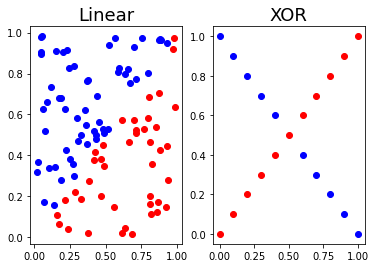

In [3]:
x1, y1 = generate_linear(n=100)
x2, y2 = generate_XOR_easy()
show_dataset(x1, y1, x2, y2)

## Basic Idea

We are trying to find the best network parameters $\theta\{w_1, w_2, w_3,...,b_1,b_2\}$ that minimize the loss $L$ .  When we get the gradient  $\nabla L$ , update the network paramter $w$ by Gradient Descent. 

## Gradient Descent

Actually we have a lot of $\nabla L$, it is a vector : <br>
$$\begin{equation}	\begin{bmatrix}	 \frac{\partial{L(\theta)}}{\partial{w_1}}\\\frac{\partial{L(\theta)}}{\partial{w_2}}\\.\\.\\.\\\frac{\partial{L(\theta)}}{\partial{b_1}}\end{bmatrix}\end{equation}$$<br>
Then compute $\nabla L(\theta^{0}),\nabla L(\theta^{1}),\nabla L(\theta^{2})...$ <br>
Update the $\theta$ , $\theta^{1}=\theta^{0}-\eta\nabla L(\theta^{0})$, we get new $\theta^{1}$.

# Compute $\nabla L$

![title](fig/fig0.png)

$L(\theta)=\sum_{n=1}^{N}C^n(\theta)$ , where $C^n$ is the distance between $y_{pred},y_{gt}$ <br>
Then do the partial to all parameters, we get : <br>
$$\frac{\partial{L(\theta)}}{\partial{w}}=\sum_{n=1}^{N}\frac{\partial{C^{n}(\theta)}}{\partial{w}}$$<br>
Next, we will focus on how to compute $\frac{\partial{C^{n}(\theta)}}{\partial{w}}$.

## Chain Rule

$$\frac{\partial{C}}{\partial{w}}=\frac{\partial{z}}{\partial{w}}\frac{\partial{C}}{\partial{z}}$$

### Forward Pass

![title](fig/fig1.png)

Compute $\frac{\partial{z}}{\partial{w}}$ for all parameters. <br>
$$\frac{\partial{z}}{\partial{w}}=x_1$$

### Backward Pass

Compute $\frac{\partial{C}}{\partial{z}}$ for all activation function inputs $z$. <br>
Use Chain rule again : <br>
$$\frac{\partial{C}}{\partial{z}}=\frac{\partial{a}}{\partial{z}}\frac{\partial{C}}{\partial{a}}$$ <br>
It is easy to compute the first term : <br>
$$\frac{\partial{a}}{\partial{z}}=\sigma'(z)$$ <br>
The difficult part is the second term that we have to concern about two cases : <br>
- output → hidden
- hidden → hidden

In this part, we have to start from the "known parameters". So we will do the "output → hidden" case fisrt. <br>
$$ \frac{\partial C}{\partial z} = L'(y, \hat{y}) $$ <br>
Now that we know the gradient of "output → hidden", we can continue to derive the previous layer "hidden → hidden" <br>
As the figure shown, we can now compute the output of previous node, then we get the backward gradient : <br>
$$\frac{\partial{C}}{\partial{z}}=\sigma '(z)[w_3\frac{\partial{C}}{\partial{z'}}+w_4\frac{\partial{C}}{\partial{z''}}]$$

![title](fig/fig2.png)

# Implement

## Requirements
1. Implement simple neural networks with two hidden layers. 

- hidden layer 1st : <br>
As the figure showing, I design the network architecture use 2 hidden layer with each 4 neurons.<br>
The training data points are $(x_1, x_2)$, so there will be two value feed input the first hidden layer, we make the input shape of first layer is 2, and output for next layer with 4 neurons. We figure out the shape of first hidden layer is (2, 4).
- hidden layer 2nd : <br>
After forwarding pass the first hidden layer, the ouput $a=\sigma(z)$ is a scalar, which means there will be only one value ouput in each neuron, but there are 4 neurons in first hidden layer, we have to design the input size of second layer as 4.
At last, ouput one answer to the output layer, so the shape of second hidden layer is (4, 1).

![title](fig/fig3.png)

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

def MSE(y, y_hat):
    return np.mean((y - y_hat)**2)
    
def derivative_loss(y, y_hat):
    return (y - y_hat)*(2/y.shape[0])

In [5]:
class layer():
    def __init__(self, input_size, output_size) -> None:
        # neuron
        self.w = np.random.normal(0, 1, (input_size, output_size))
        self.gradient = None
    
    def forward(self, X):
        z = X@self.w
        self.forward_gradient = X
        self.a = sigmoid(z)
        return self.a

    def backward(self, derivative_C):
        self.backward_gradient = np.multiply(
            derivative_sigmoid(self.a), 
            derivative_C
        )
        return np.matmul(self.backward_gradient, self.w.T) 
    
    def update_param(self):
        self.gradient = np.matmul(
            self.forward_gradient.T, 
            self.backward_gradient
        )
        self.w += LEARNING_RATE*self.gradient

In [6]:
class Model():
    def __init__(self) -> None:
        self.hidden_layer_1 = layer(2, 4)
        self.hidden_layer_2 = layer(4, 1)
        pass
    
    def forward(self, X, y):
        a1 = self.hidden_layer_1.forward(X)
        y_pred = self.hidden_layer_2.forward(a1)
        loss = MSE(y, y_pred)
        return y_pred, loss

    def backward(self, d_loss):
        g1 = self.hidden_layer_2.backward(d_loss)
        g2 = self.hidden_layer_1.backward(g1)
        return g1, g2
    
    def update(self):
        self.hidden_layer_2.update_param()
        self.hidden_layer_1.update_param()

In [7]:
# hyperparameter
EPOCH = 10000
LEARNING_RATE = 1

#### Train & Predict Linear Data

epoch : 0 loss : 0.4065928696177702 
epoch : 500 loss : 0.03639958058953619 
epoch : 1000 loss : 0.023322655074466434 
epoch : 1500 loss : 0.01820058813621331 
epoch : 2000 loss : 0.015285348740160552 
epoch : 2500 loss : 0.013345714253245657 
epoch : 3000 loss : 0.01193800813891644 
epoch : 3500 loss : 0.010859900991891323 
epoch : 4000 loss : 0.010004239290592692 
epoch : 4500 loss : 0.00930779795416642 
epoch : 5000 loss : 0.008730130001238881 
epoch : 5500 loss : 0.008243743846093223 
epoch : 6000 loss : 0.00782908725198455 
epoch : 6500 loss : 0.007471772651082057 
epoch : 7000 loss : 0.007160934410369349 
epoch : 7500 loss : 0.0068881991019201574 
epoch : 8000 loss : 0.006647008808036786 
epoch : 8500 loss : 0.006432158949341745 
epoch : 9000 loss : 0.006239472611502498 
epoch : 9500 loss : 0.006065565171026624 


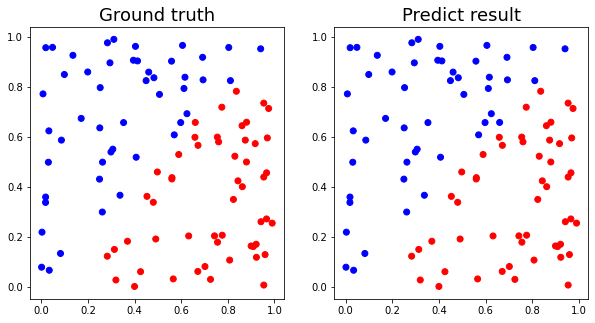

In [8]:
X, y = generate_linear(n=100)
# trian
model_linear = Model()
for epoch in range(EPOCH):
    y_pred, loss = model_linear.forward(X, y)
    d_loss = derivative_loss(y, y_pred)
    g1, g2 = model_linear.backward(d_loss)
    model_linear.update()

    if epoch%500 == 0:
        print(f'epoch : {epoch} loss : {loss} ')
y_linear, none = model_linear.forward(X, y)
show_result(X, y, y_linear)

#### Train & Predict X_OR Data

epoch : 0 loss : 0.30277922403953894 
epoch : 500 loss : 0.2146752544926968 
epoch : 1000 loss : 0.1603805237015846 
epoch : 1500 loss : 0.09365789075466419 
epoch : 2000 loss : 0.06510436075525242 
epoch : 2500 loss : 0.04935610325225356 
epoch : 3000 loss : 0.038559891231426696 
epoch : 3500 loss : 0.03039198376094741 
epoch : 4000 loss : 0.02404270562601097 
epoch : 4500 loss : 0.01913834116827476 
epoch : 5000 loss : 0.015397197950184691 
epoch : 5500 loss : 0.01256008787951012 
epoch : 6000 loss : 0.010402610880787946 
epoch : 6500 loss : 0.008746953247501275 
epoch : 7000 loss : 0.007460187264602075 
epoch : 7500 loss : 0.006445846045753323 
epoch : 8000 loss : 0.005634667054052295 
epoch : 8500 loss : 0.004976885770098459 
epoch : 9000 loss : 0.004436490818243575 
epoch : 9500 loss : 0.003987146602343105 


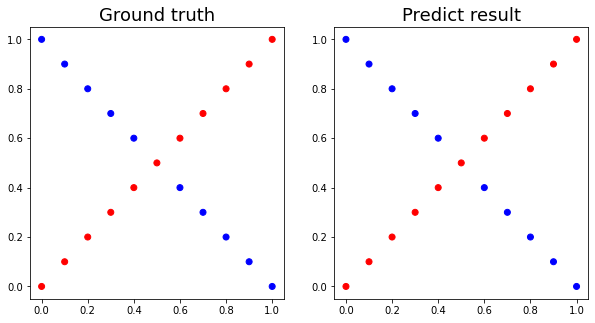

In [9]:
X_or, y_or = generate_XOR_easy()

# trian
model_xor = Model()
for epoch in range(EPOCH):
    y_pred, loss = model_xor.forward(X_or, y_or)
    d_loss = derivative_loss(y_or, y_pred)
    g1, g2 = model_xor.backward(d_loss)
    model_xor.update()

    if epoch%500 == 0:
        print(f'epoch : {epoch} loss : {loss} ')
y_linear, none = model_xor.forward(X_or, y_or)
show_result(X_or, y_or, y_linear)